In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def solve(x):
    mask, gender, age = None, None, None
    if x==0:
        mask, gender, age = 0, 0, 0
    if x==1:
        mask, gender, age = 0, 0, 1
    if x==2:
        mask, gender, age = 0, 0, 2
    if x==3:
        mask, gender, age = 0, 1, 0
    if x==4:
        mask, gender, age = 0, 1, 1
    if x==5:
        mask, gender, age = 0, 1, 2
    if x==6:
        mask, gender, age = 1, 0, 0
    if x==7:
        mask, gender, age = 1, 0, 1
    if x==8:
        mask, gender, age = 1, 0, 2
    if x==9:
        mask, gender, age = 1, 1, 0
    if x==10:
        mask, gender, age = 1, 1, 1
    if x==11:
        mask, gender, age = 1, 1, 2
    if x==12:
        mask, gender, age = 2, 0, 0
    if x==13:
        mask, gender, age = 2, 0, 1
    if x==14:
        mask, gender, age = 2, 0, 2
    if x==15:
        mask, gender, age = 2, 1, 0
    if x==16:
        mask, gender, age = 2, 1, 1
    if x==17:
        mask, gender, age = 2, 1, 2
    return mask, gender, age

In [20]:
def foo(df):
    one = []
    two = []
    three = []
    for idx in range(len(df_224)):
        pm, pg, pa = solve(df['pred'].loc[idx])
        sm, sg, sa = solve(df['label'].loc[idx])
        if pm != sm and pg != sg and pa != sa:
            three.append(idx)
        elif pm != sm and pg == sg and pa == sa:
            one.append(idx)
        elif pm == sm and pg != sg and pa == sa:
            one.append(idx)
        elif pm == sm and pg == sg and pa != sa:
            one.append(idx)
        else:
            two.append(idx)
    return one, two, three

In [21]:
def draw_confusion_matrix(target, pred):
        cm = confusion_matrix(target, pred)
        df = pd.DataFrame(cm/np.sum(cm, axis=1)[:, None], 
					index=list(range(18)), columns=list(range(18)))
        df = df.fillna(0)  # NaN 값을 0으로 변경

        plt.figure(figsize=(12, 12))
        plt.tight_layout()
        plt.suptitle('Confusion Matrix')
        sn.heatmap(df, annot=True, cmap=sn.color_palette("Blues"))
        plt.xlabel("Predicted Label")
        plt.ylabel("True label")

In [22]:
df = pd.read_csv('/opt/ml/input/data/eval/difff1ce.csv')
df.head()

,Unnamed: 0,pred,label
0,0,2,2
1,1,3,3
2,2,9,9
3,3,4,4
4,4,5,5


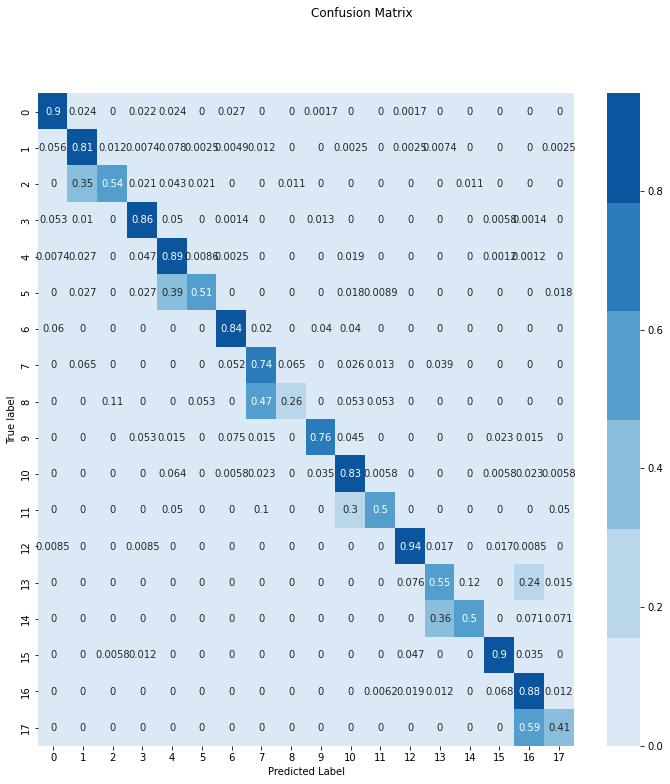

In [23]:
draw_confusion_matrix(df['label'],df['pred'])

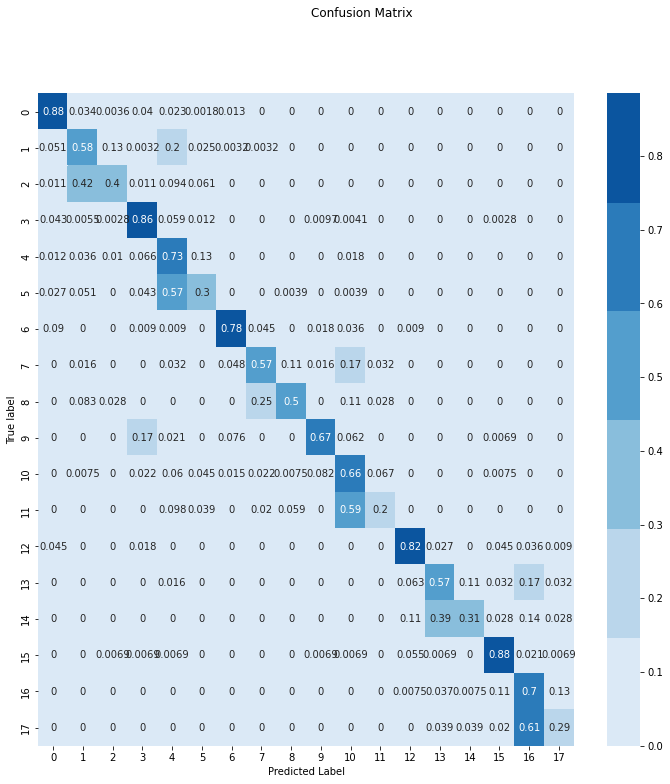

In [24]:
df2 = pd.read_csv('/opt/ml/input/data/eval/diff.csv')
draw_confusion_matrix(df2['label'],df2['pred'])